# Classical and quantum random walks for fixed angle theta:

In [1]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Average of classical and ideal average of quantum random walk probability distributions:
mu = 0

# Classical random walk wave function after time t (in steps):
def classical_psi(t):
    sigma = classical_stdev(t)
    num_nodes = 2 * t + 1
    nodes = np.arange(num_nodes) - t
    return np.sqrt(np.exp(-(1/2) * ((nodes - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi)))

# Classical random walk standard deviation after time t (in steps):
def classical_stdev(t):
    return np.sqrt(t/4)

In [3]:
# The imaginary number for the complex quantum coin operator below = i = √(-1):
i = 1j

# Quantum coin operator:
def C_hat(plus, minus, theta):
    new_plus = np.cos(theta) * plus + i * np.sin(theta) * minus
    new_minus = i * np.sin(theta) * plus + np.cos(theta) * minus
    return (new_plus, new_minus)

# Conditional translation quantum operator for walking right:
def T_hat_plus(plus):
    temp = plus[-1]
    plus[1:] = plus[0:-1]
    plus[0] = temp
    return plus

# Conditional translation quantum operator for walking left:
def T_hat_minus(minus):
    temp = minus[0]
    minus[0:-1] = minus[1:]
    minus[-1] = temp
    return minus

In [4]:
# Next quantum wave function for walking each step left:
def next_psi_plus(plus, minus, theta):
    return T_hat_plus(C_hat(plus, minus, theta)[0])

# Next quantum wave function for walking each step right:
def next_psi_minus(plus, minus, theta):
    return T_hat_minus(C_hat(plus, minus, theta)[1])

In [5]:
# Final quantum wave function for the entire quantum random walk after time t (in steps):
def total_quantum_psi(t, thetas, print_out=False):
    num_nodes = 2 * t + 1
    plus = np.zeros(num_nodes)
    plus[t] = 1 / np.sqrt(2)
    minus = plus
    if (print_out):
        print('step 0 plus =', plus, '\n step 0 minus =', minus)
    for j in range(t):
        temp = next_psi_plus(plus, minus, thetas[j])
        minus = next_psi_minus(plus, minus, thetas[j])
        plus = temp
        if (print_out):
            print('step', j+1,'plus =', plus, '\n step', j+1,'minus =', minus)
    return np.sqrt(np.abs(plus)**2 + np.abs(minus)**2)

In [6]:
# Here is the default for t = num_steps = 2, so theta = π/4 and C = fair coin = [[1, i], [i, 1]]:
num_steps = 2
theta = np.pi / 4
total_quantum_psi(t=num_steps, thetas=num_steps*[theta], print_out=True)

step 0 plus = [0.         0.         0.70710678 0.         0.        ] 
 step 0 minus = [0.         0.         0.70710678 0.         0.        ]
step 1 plus = [0. +0.j  0. +0.j  0. +0.j  0.5+0.5j 0. +0.j ] 
 step 1 minus = [0. +0.j  0.5+0.5j 0. +0.j  0. +0.j  0. +0.j ]
step 2 plus = [ 0.        +0.j          0.        +0.j         -0.35355339+0.35355339j
  0.        +0.j          0.35355339+0.35355339j] 
 step 2 minus = [ 0.35355339+0.35355339j  0.        +0.j         -0.35355339+0.35355339j
  0.        +0.j          0.        +0.j        ]


array([0.5       , 0.        , 0.70710678, 0.        , 0.5       ])

In [7]:
# Mean and standard deviation of the quantum random walk after time t (in steps):
def quantum_stats(nodes, walk):
    mean = sum(nodes * walk) / len(nodes)
    stdev = sum(nodes**2 * walk**2) / len(nodes) - mean
    return (mean, stdev)

In [8]:
# Plot of both classical and quantum random walks after time t (in steps):
def plot_walks(t, thetas, walk, seed=0):
    num_nodes = 2 * t + 1
    nodes = np.arange(num_nodes) - t
    quantum_psi_squared = total_quantum_psi(t, thetas)**2
    plot = (walk == (walk // plot_interval) * plot_interval)
    if plot:
        mean, stdev = quantum_stats(nodes, quantum_psi_squared)
        stats = 'µ = ' + decimal_places_format%(mean) + '\n$\sigma$ = ' + decimal_places_format%(stdev)
        stats += '\nseed = ' + integer_format%(seed) if seed else '\n$\\theta$ = ' + \
                 decimal_places_format%(thetas[0]/np.pi) + ' π'
        stats += '\n$\\theta_1$ = ' + decimal_places_format%(thetas[0]/np.pi) + ' π \n$\\theta_2$ = ' + \
                 decimal_places_format%(thetas[1]/np.pi) + ' π' if (seed == two_angle_seed) else ''
        plt.errorbar(nodes, classical_psi(t)**2, fmt='--', color='red')
        plt.plot(nodes, quantum_psi_squared, color='black', label=stats)
        plt.xlim(-t, t)
        y_min, y_max = -0.001, 0.08
        plt.ylim(y_min, y_max)
        x_ticks_min, x_ticks_max, x_ticks_step = -t, t+1, t//2
        x_ticks = np.arange(x_ticks_min, x_ticks_max, x_ticks_step)
        plt.xticks(x_ticks, fontsize=12)
        y_ticks_min, y_ticks_max, y_ticks_step = 0, 0.081, 0.02
        y_ticks = np.arange(y_ticks_min, y_ticks_max, y_ticks_step)
        plt.yticks(y_ticks, fontsize=12)
        plt.xlabel('Node', fontsize=12)
        plt.ylabel('|$\psi$|$^2$', fontsize=12)
        plt.legend(loc='upper right', fontsize=12)
        if (walk == num_walks):
            # Plot the very last (aka 100th) walk below, instead of saving it as an image:
            plt.show()
        else:
            img_name = './images/'
            img_name += '2' if (seed == two_angle_seed) else ('random' if seed else 'fixed')
            img_name += '_angle_' + str(walk) + '.png'
            plt.savefig(img_name)
            plt.clf()
    return quantum_psi_squared

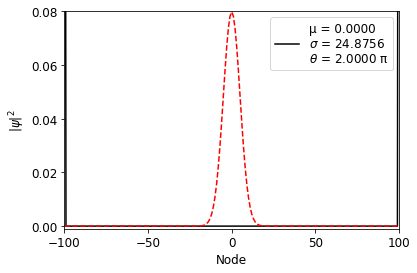

In [9]:
# Set initial value of two_angle_seed to -1, since we will use it later:
two_angle_seed = -1
# Plot of both classical and quantum random walks after time t = 100 and angles in array fixed_angles below:
num_steps = 100
# Number of quantum walks = length of array fixed_angles = 100:
num_walks = 100
whole_percent = 100
integer_format = '%0.0f'
lowest_num_decimal_places = 4
num_decimal_places = max(int(np.log10(num_walks)) + 2, lowest_num_decimal_places)
decimal_places_format = '%0.' + integer_format%(num_decimal_places) + 'f'
percent_walks_to_plot = 10
num_walks_to_plot = num_walks * percent_walks_to_plot / whole_percent
plot_interval = num_walks // num_walks_to_plot
fixed_angles = 2 * np.arange(num_walks) * np.pi / (num_walks - 1)
# Fixed angle walk plots for visual and probabilities for machine learning:
fixed_walk_probs = []
for j in range(num_walks):
    fixed_walk_probs += [plot_walks(t=num_steps, thetas=num_steps*[fixed_angles[j]], walk=j+1)]

In [10]:
# Plots classical and quantum standard deviation vs time up to given max time:
def plot_stdev_vs_time(max_time, theta):
    times = np.arange(max_time+1)
    stdevs = np.empty(max_time+1)
    for t in times:
        num_nodes = 2 * t + 1
        nodes = np.arange(num_nodes) - t
        quantum_psi_squared = total_quantum_psi(t, t*[theta])**2
        stdevs[t] = quantum_stats(nodes, quantum_psi_squared)[1]
    plt.errorbar(times, classical_stdev(t), fmt='--', color='red')
    plt.plot( times, stdevs, color='black', label='$\\theta$ = ' + decimal_places_format%(theta/np.pi) + \
             ' π \nmax time = ' + integer_format%(max_time) )
    x_min, x_max = -1, max_time+1
    plt.xlim(x_min, x_max)
    max_stdev = max(np.sqrt(times[-1]), stdevs[-1])
    y_min, y_max = -1, max_stdev+2
    plt.ylim(y_min, y_max)
    x_ticks_min, x_ticks_max, x_ticks_step = 0, max_time+1, max_time//10
    plt.xticks(np.arange(x_ticks_min, x_ticks_max, x_ticks_step), fontsize=12)
    y_ticks_min, y_ticks_max, y_ticks_step = 0, 7*max_stdev//5, max_stdev//5
    plt.yticks(np.arange(y_ticks_min, y_ticks_max, y_ticks_step), fontsize=12)
    plt.xlabel('time t', fontsize=12)
    plt.ylabel('standard deviation $\sigma$', fontsize=12)
    return plt.legend(loc='upper right', fontsize=12)

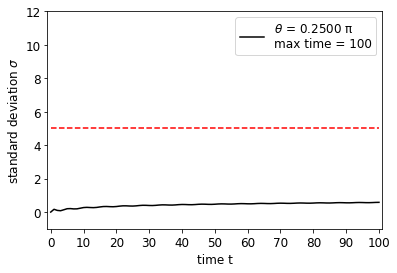

In [11]:
# Default angle = π/4 and max_time = num_steps still = 100:
plot_stdev_vs_time(max_time=num_steps, theta=np.pi/4)

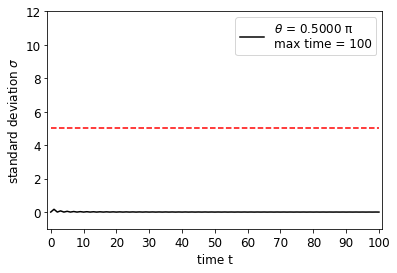

In [12]:
# Default angle = π/2 and max_time = num_steps still = 100:
plot_stdev_vs_time(max_time=num_steps, theta=np.pi/2)

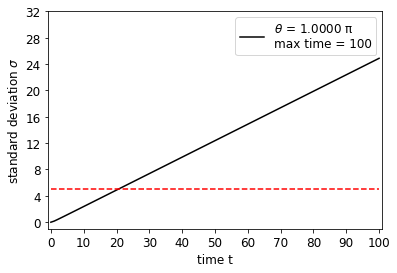

In [13]:
# Default angle = π and max_time = num_steps still = 100:
plot_stdev_vs_time(max_time=num_steps, theta=np.pi)

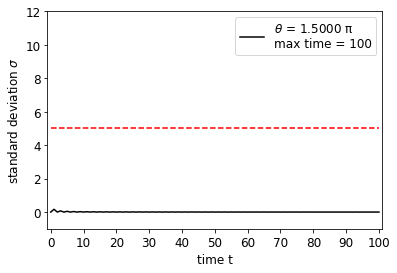

In [14]:
# Default angle = 3π/2 and max_time = num_steps still = 100:
plot_stdev_vs_time(max_time=num_steps, theta=3*np.pi/2)

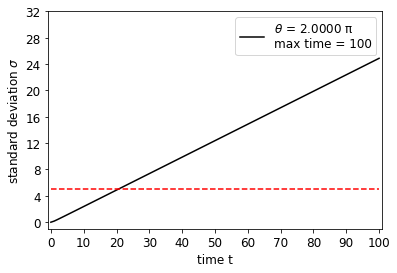

In [15]:
# Default angle = 2π and max_time = num_steps still = 100:
plot_stdev_vs_time(max_time=num_steps, theta=2*np.pi)

In [16]:
# Plots classical and quantum standard deviation vs angle up to given max angle:
def plot_stdev_vs_angle(max_angle, t, num_points=100):
    num_nodes = 2 * t + 1
    nodes = np.arange(num_nodes) - t
    thetas = np.arange(num_points+1) * (max_angle / num_points)
    stdevs = np.empty(num_points+1)
    for point in range(len(thetas)):
        quantum_psi_squared = total_quantum_psi(t, t*[thetas[point]])**2
        stdevs[point] = quantum_stats(nodes, quantum_psi_squared)[1]
    sigma = classical_stdev(t)
    plt.errorbar(thetas, sigma, fmt='--', color='red')
    plt.plot(thetas, stdevs, color='black', label='time = ' + integer_format%(t) + ' \nmax angle = ' + \
             decimal_places_format%(max_angle/np.pi) + ' π')
    max_stdev = max(sigma, stdevs[0])
    x_min, x_max = -0.01, max_angle+0.01
    plt.xlim(x_min, x_max)
    y_min, y_max = -1, max_stdev+2
    plt.ylim(y_min, y_max)
    x_ticks_min, x_ticks_max, x_ticks_step = 0, max_angle+0.01, max_angle*20//10/10
    plt.xticks(np.arange(x_ticks_min, x_ticks_max, x_ticks_step), fontsize=12)
    y_ticks_min, y_ticks_max, y_ticks_step = 0, 7*max_stdev//5, max_stdev//5
    plt.yticks(np.arange(y_ticks_min, y_ticks_max, y_ticks_step), fontsize=12)
    plt.xlabel('angle $\\theta$', fontsize=12)
    plt.ylabel('standard deviation $\sigma$', fontsize=12)
    return plt.legend(loc='upper right', fontsize=12)

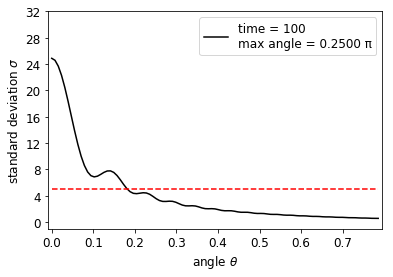

In [17]:
# Default max_angle = π/4 and time t = num_steps still = 100:
plot_stdev_vs_angle(max_angle=np.pi/4, num_points=num_steps, t=num_steps)

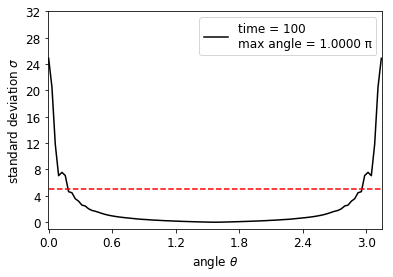

In [18]:
# Max_angle now = π and time t still = num_steps still = 100:
plot_stdev_vs_angle(max_angle=np.pi, num_points=num_steps, t=num_steps)

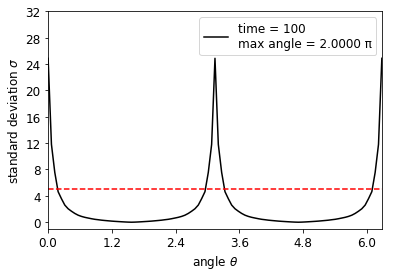

In [19]:
# Max_angle now = 2π and time t still = num_steps still = 100:
plot_stdev_vs_angle(max_angle=2*np.pi, num_points=num_steps, t=num_steps)

# Random angle theta for each time step (aka C_hat matrix):

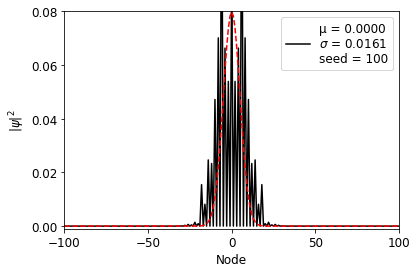

In [20]:
# num_walks still = 100
# num_steps still = 100
# Random angle walk plots for visual and probabilities for machine learning:
random_walk_probs = []
for j in range(num_walks):
    np.random.seed(j+1)
    random_angles = 2 * np.random.random(num_steps) * np.pi
    random_walk_probs += [plot_walks(t=num_steps, thetas=random_angles, walk=j+1, seed=j+1)]

In [21]:
# Standard deviation vs seed for seeds 1 to max_seed and fixed number of time steps t in *only* quantum walk:
def plot_stdev_vs_seed(t, max_seed):
    stdevs = np.empty(max_seed)
    num_nodes = 2 * t + 1
    for seed in range(max_seed):
        np.random.seed(seed+1)
        quantum_psi_squared = total_quantum_psi(t, thetas=np.random.random(t))**2
        stdevs[seed] = quantum_stats(np.arange(num_nodes)-t, quantum_psi_squared)[1]
    plt.plot(np.arange(max_seed)+1, stdevs, color='black', label='time = ' + integer_format%(t) + \
                                                                 ' \nmax seed = ' + integer_format%(max_seed) )
    max_stdev = max(stdevs)
    x_min, x_max = 0, max_seed+1
    plt.xlim(x_min, x_max)
    y_min, y_max = -0.01, max_stdev+0.01
    plt.ylim(y_min, y_max)
    x_ticks_min, x_ticks_max, x_ticks_step = 0, max_seed+2, max_seed//10
    plt.xticks(np.arange(x_ticks_min, x_ticks_max, x_ticks_step), fontsize=12)
    y_ticks_min, y_ticks_max, y_ticks_step = 0, 7*max_stdev/5, max_stdev/5
    plt.yticks(np.arange(y_ticks_min, y_ticks_max, y_ticks_step), fontsize=12)
    plt.xlabel('random seed', fontsize=12)
    plt.ylabel('standard deviation $\sigma$', fontsize=12)
    return plt.legend(loc='upper right', fontsize=12)

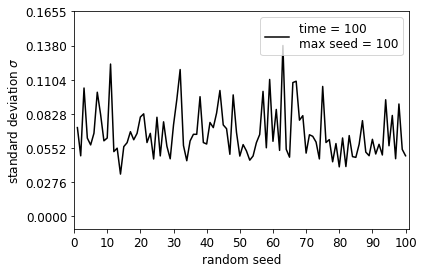

In [22]:
# Standard deviation vs seed for seeds 1 to 100 and 100 time steps (aka plots just above):
# num_walks still = 100 and num_steps still = 100
plot_stdev_vs_seed(t=num_steps, max_seed=num_walks)

# Random selection between 2 angles for each time step (aka C_hat matrix):

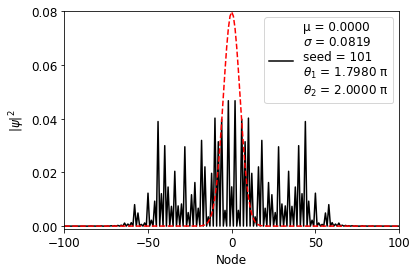

In [23]:
# Set random seed for 2 angle selection to num_walks + 1 =
# (last seed for random angles above) + 1 = 100 + 1 = 101:
two_angle_seed = num_walks + 1
np.random.seed(two_angle_seed)
# num_steps still = 100 and num_walks still = 100
two_angle_walk_probs = []
for index in range(num_walks):
    angle_1 = fixed_angles[index-num_walks//10]
    angle_2 = fixed_angles[index]
    two_angle_selections = []
    for t in range(num_steps):
        angle_choice = np.random.uniform()
        if (angle_choice < 0.5):
            angle_choice = 0
        else:
            angle_choice = 1
        two_angle_selections += [angle_1 * angle_choice + angle_2 * (1 - angle_choice)]
    two_angle_walk_probs += [plot_walks(t=num_steps, thetas=two_angle_selections, walk=index+1, \
                                        seed=two_angle_seed)]

# Machine learning for fixed vs random vs 2 angle thetas from probabilities:

In [24]:
# Note that num_walks still = 100 from our plots above.
num_classes = 2
class_indexes = np.arange(num_classes) + 1
# Test image labels (denoted by numbers 1, 2, ... , num_test_images-1, num_test_images):
test_image_names = np.arange(num_test_images) + 1


# In[ ]:


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
print('For Logistic Classification of ' + str(num_walks) + ' fixed ' +       'and ' + str(num_walks) + ' random angle quantum walk plots:')
unsup = KMeans(n_clusters=num_classes)
unsup.fit(X)
predictY = unsup.predict(X)
acc = len(np.where(predictY == testY)[0]) / len(testY)
print('Accuracy = %0.3f = %0.1f'%(acc, whole_percent*acc), '% and Confusion Matrix =')
print(confusion_matrix(testY, predictY))


# In[ ]:


from sklearn.linear_model import LogisticRegressionCV
print('For Logistic Classification of ' + str(num_walks) + ' fixed ' +       'and ' + str(num_walks) + ' random angle quantum walk plots:')
# Number of images in each class for fitting:
num_fit_images = 0.7 * num_walks
# Number of images in each class for testing = num_walks:
num_test_images = 0.3 * num_walks

fitX, fitY, testX, testY = [], [], [], []
sample_image_name = './images/sample_image.png'
plt.clf(); plt.savefig(sample_image_name)
sample_image = cv2.imread(sample_image_name)
image_width = sample_image.shape[1]
start_index = 2 * image_width // 5
end_index = 3 * image_width // 5
# Note that for our 2 classes, class -1 means fixed angle, and class 1 means random angle.
for class_index in class_indexes
    fitX += num_fit_images * [class_index]
    fitY += num_fit_images * [class_index]
    for test_image_name in test_image_names:
        test_image_name += class_index * num_test_images
        test_image_name = './images/' + str(test_image_name) + '.png'
        test_image = cv2.imread(test_image_name)
        # Cut away ends of test image:
        test_image = test_image[:, start_index:end_index]
        # Reshape test image array from 3D into 1D array:
        test_image_arr = test_image.reshape(-1)
        # Cut away "white" areas of test image array:
        test_image_arr = test_image_arr[np.where(test_image_arr != 255)]
        # Sum the remaining image array elements:
        test_image_sum = np.sum(test_image_arr)
        test_image_sum = 
        testX += [test_image_sum]
    testY += num_test_images * [class_index]
fitX = np.array(fitX).reshape(-1, 1); fitY = np.array(fitY)
testX = np.array(testX).reshape(-1, 1); testY = np.array(testY)
logCV = LogisticRegressionCV()
logCV.fit(fitX, fitY)
predictY = logCV.predict(testX)
print(fitX, '\n', fitY)
print(testX, '\n', 'testY = ', testY, '\n predictY = ', predictY)
acc = len(np.where(predictY == testY)[0]) / len(testY)
print('Accuracy = %0.3f = %0.1f'%(acc, whole_percent*acc), '% and Confusion Matrix =')
print(confusion_matrix(testY, predictY))

SyntaxError: invalid syntax (<ipython-input-24-0ea4973c7bf7>, line 40)